In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data() 

In [3]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

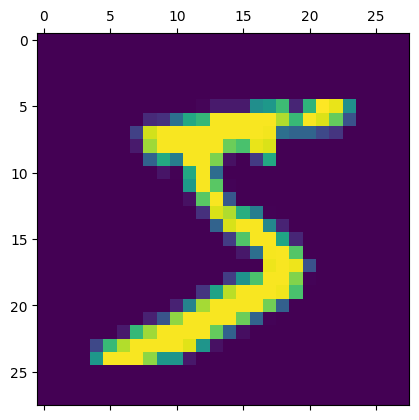

In [6]:
plt.matshow(X_train[0])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(30,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),

    keras.layers.Flatten(),

    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9121 - loss: 0.3067


In [10]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9754 - loss: 0.0718


[0.05857601389288902, 0.9800999760627747]

In [11]:
y_predict = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [12]:
y_predict[0]

array([2.9250095e-02, 1.1728391e-02, 6.5965641e-01, 8.0611610e-01,
       1.4983460e-03, 2.6259846e-03, 1.2717443e-06, 9.9995130e-01,
       2.2042084e-01, 1.8549208e-01], dtype=float32)

In [13]:
np.argmax(y_predict[0])

7

In [14]:
y_test[0]

7

In [15]:
res = [np.argmax(i) for i in y_predict]

In [16]:
res[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [17]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=res)

Text(95.72222222222221, 0.5, 'Observed')

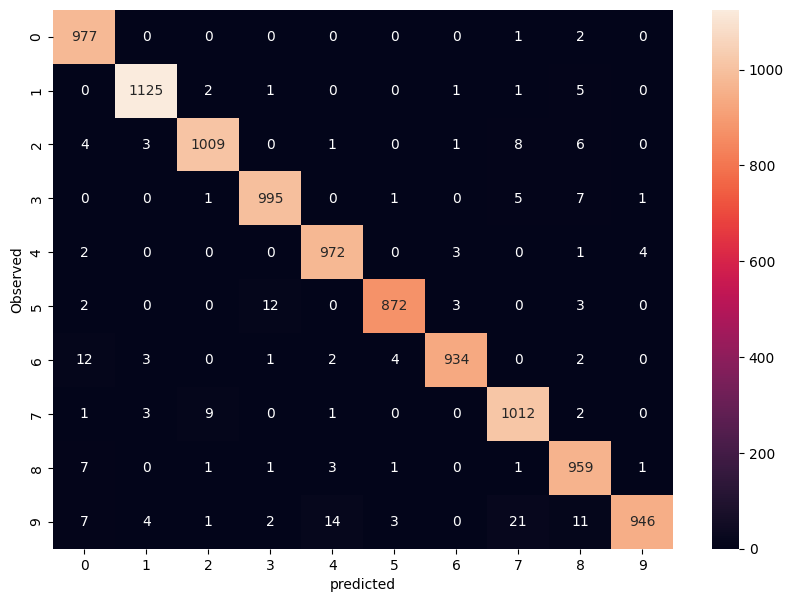

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Observed')